# Assessment Cover Page

## Content 

- ### **[Probability (Discrete)](#section8)**
    - **[Introduction](#section9)**
    - **[Sample space](#section10)**
    - **[Solution 1](#section11)**
    - **[Solution 2](#section12)**
- ### **[Probability (Continuous)](#section13)**
    - **[Introduction](#section14)**
    - **[Scenario 1 (exactly 85 minutes in the Zoo)](#section15)**
    - **[Scenario 2 (less than 85 minutes in the Zoo)](#section16)**
    - **[Scenario 3 (more than 85 minutes in the Zoo)](#section17)**
    - **[Scenario 4 (between 85 and 100 minutes in the Zoo)](#section18)**
    - **[Scenario 5 (Injuries)](#section19)**


In [40]:
import pandas as pd
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree     
from sklearn import metrics                           
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings("ignore")

<a id="section8"></a>
## Probability (Discrete)


<a id="section9"></a>
### Introduction

For calculating a probability for the given event:

**What is the probability of rolling exactly two 6s in five rolls of a fair die?**

We will use the binomial probability formula.
However, before filling the formula we will try to explain and find each element.

$$ P(X = k) = \binom{n}{k} \times p^k \times (1-p)^{n-k} $$
***
**<center> $$ n $$ number of trials  </center>**
***
**<center> $$ k $$ number of successful outcomes  </center>**
***
**<center> $$ p $$ probability of success on each trial  </center>**
***
**<center> $$ \binom{n}{k} $$ (binomial coefficient) number of ways to choose k successes out of n trials  </center>**


<a id="section10"></a>
### Sample space

First of all, we will define our sample space which includes all possible outcomes and equals 1 or 100%.
We can calculate several possible outcomes by putting 6 in power of 5 because each die with 6 dots is represented in 5 dimensions. We get 7776 possible combinations for five dies. For clarity let's make a simple table.

|  Outcome number |die 1|die 2|die 3|die 4|die 5|
|---|---|---|---|---|---|
|**1**|1|1|1|1|1|
|**2**|1|1|1|1|2|
|**3**|1|1|1|1|3|
|**4**|1|1|1|1|4|
|**5**|1|1|1|1|5|
|**6**|1|1|1|1|6|
|**7**|1|1|1|2|1|
|...|...|...|...|...|...|
|**7776**|6|6|6|6|6|

So, we can see that the probability of each combination equals (1/7776)=0.00012 or 0.012%. In other words, if we roll the die 5 times the liklyhood of getting an exact combination (in order) is 0.012%. The probability for each combination in this case will be the same because each outcome in a specific order takes only one row in sample space and a "piece" of probability which belongs to that row.
However, if the order does not matter to us, we can calculate how many times the combination occurs in the sample space. For example combination (1, 2, 3, 4, 5, 6) has 720 possible variations(6 factorial). In other words, the combination (1,2,3,4,5,6) occurs in our sample space with 720 different variations. And if we know that one variation has a probability of 0.00012 we can calculate the probability (0.00012 * 720 = 0.086 or 8.6%).

<a id="section11"></a>
### Solution 1

Regarding the task of getting 2 same 6s among 5 dies with 6 dots each.
For this calculation, we need to divide our sample space into two parts (separately 2 and 3 dies). 

**<center> Two dies sample space  </center>**

|  Outcome number |die 1|die 2|
|---|---|---|
|**1**|1|1|
|**2**|1|2|
|**3**|1|3|
|**4**|1|4|
|**5**|1|5|
|**6**|1|6|
|**7**|2|1|
|...|...|...|
|**36**|6|6|

For this sample space, we have only 1 row out of 36 which responds to our requirements of getting two 6s. So probability equals 1/36.

Secondly, we need to find the probability that we will get any three numbers on the other dies except number 6.
To do this we will create a sample space for 3 dies with 6 dots where the number of variations equals (6 in power of 3 = 216). However, we need to exclude from this sample space all combinations where '6' occurs. To do that we will just form another sample space for 3 dies with 5 dots, which equals (5 in power of 3 = 125). 
So, now we know that in sample space where 3 dies have 6 dots 216 possible combinations (125 of them any numbers without number 6, and 91 combinations where at least one number 6). Consequently, the probability of getting any number except 6 rolling 3 dies is 125/216.

**<center> Three dies (with 6s) and (without 6s) sample spaces  </center>**

|  Outcome number |die 3|die 4|die 5| |  Outcome number |die 3|die 4|die 5|
|---|---|---|---| |---|---|---|---|
|**1**|1|1|1| |**1**|1|1|1|
|**2**|1|1|2| |**2**|1|1|2|
|**3**|1|1|3| |**3**|1|1|3|
|**4**|1|1|4| |**4**|1|1|4|
|**5**|1|1|5| |**5**|1|1|5|
|**6**|1|1|6| |**6**|1|2|1|
|**7**|1|2|1| |**7**|1|2|2|
|...|...|...|...| |...|...|...|...|
|**216**|6|6|6| |**125**|5|5|5|

In this stage we found out all element of the formula exept binomial coefficient.

$$ P(X = 2) =\binom{n}{k} * \frac{1}{36} * \frac{125}{216} $$

In order to find a binomial coefficient we need complete following formula

$$ \binom{n}{k} = \frac{n!}{k!(n-k)!} $$


$$ \binom{n}{k} = \frac{5!}{2!(5-2)!} = \frac{120}{12} = 10 $$

Now we have all part of the formula and we can calculate probability

$$ P(X = 2) = 10 * \frac{1}{36} * \frac{125}{216} = \frac{10}{36} * \frac{125}{216} = \frac{1250}{7776}$$

Given value (1250/7776) represents the number of records which respond to our condition (exactly two 6s and 3 any numbers except 6s) in the general sample space. The probability equals **0.1607 or 16%**

<a id="section12"></a>
### Solution 2

We also can calculate the probability using python language.
Firstly we need to create a sample space by listing all possible combinations for 5 dies, as it has been done in beginning but in short version.
- Import pandas for store data
- create a list with digits (possible outcomes for each die)
- create an empty list for combinations.
- apply a loop for each die which runs through the list(n) 
- set the same loop within the previos loop, repeat for each die.
- create a variable (combination) with will store values from the each loop.
- add current combination by function append to the list (sample_space) created before
- store sample space as a dataframe using pandas

In [73]:
import pandas as pd

n = [1, 2, 3, 4, 5, 6]

sample_space = []

for die1 in n:
    for die2 in n:
        for die3 in n:
            for die4 in n:
                for die5 in n:
                    combination = (die1, die2, die3, die4, die5)
                    sample_space.append(combination)

df = pd.DataFrame(sample_space, columns=['die_1', 'die_2', 'die_3', 'die_4', 'die_5'])

df.shape

(7776, 5)

As we can see a dataframe was created and it looks exactly as we wanted.
Now we need to calculate number of records where "6" is written only two times.

In [72]:
P_X2 = ((df == 6).sum(axis=1) == 2).sum()

print("Number of rows only with two 6s ->", P_X2)

Number of rows only with two 6s -> 1250


As we can see we have the same result.

***

<a id="section13"></a>
## Probability (Continuous)

<a id="section14"></a>
### Introduction


For calculation the probability of some specific scenario we will use the probability mass function of the Poisson distribution:

$$ P(X = k) = \frac{e^{-\lambda} \lambda^k}{k!} $$

Usind modifications of this formula and including value 1 as a general probability we can calculate a probability for different events, such as:
1. Probability that random visitor will spend exactly 85 minutes in the Zoo
2. Probability that random visitor will spend less than 85 minutes in the Zoo
3. Probability that random visitor will spend more than 85 minutes in the Zoo 
4. Probability that random visitor will spend between 85 and 100 minutes in the Zoo

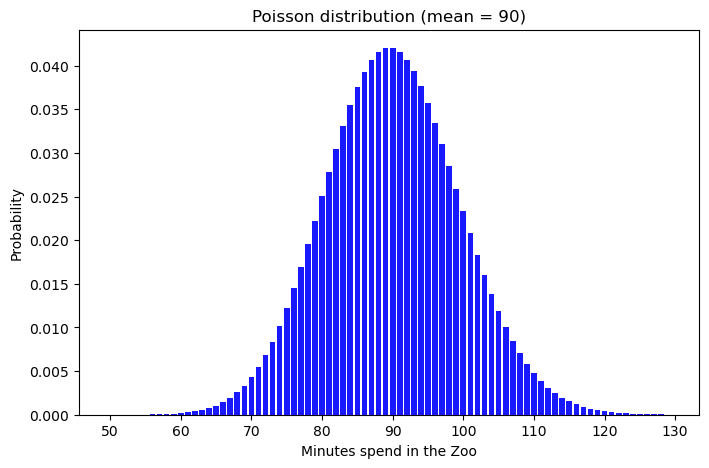

In [120]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

mean = 90
x = np.arange(50, 130)

dist = poisson.pmf(x, mean)

plt.figure(figsize=(8, 5))
plt.bar(x, dist, color='blue', alpha=0.9)
plt.xlabel('Minutes spend in the Zoo')
plt.ylabel('Probability')
plt.title('Poisson distribution (mean = 90)')

plt.show()

This chart perfectly illustrates how probability is spread. Each bar represents a number of minute when a visitor left the Zoo. The total length of all bars equals 1 or 100%. Using the probability mass function we can calculate the "length" (propbability) for any bar. 

***

<a id="section15"></a>
### Scenario 1 (exactly 85 minutes in the Zoo)

The probability mass function of the Poisson distribution calculates exact probabality for selected segment of the whole distrebution, in other words, the length of specific bar.


$$ P(X = 85) = \frac{2.71828^{-90} 90^{85}}{85!} $$

$$ k= target = 85 $$
$$ \lambda = mean = 90 $$
$$ e = log = 2.71828 $$


In [132]:
import math
k = 85
e = 2.71828
m = 90
f_85 = math.factorial(k)

p = ((e ** -m)*(m ** k))/(f_85)
p_precentage = p*100
print("P(X=85) =", p)
print("Percentage of probability:", p_precentage, "%")

P(X=85) = 0.03752609077450859
Percentage of probability: 3.7526090774508587 %


We can conclude that if mean equals 90 minutes per visit, the propality that random visitor will spend exactly 85 minutes equals 3.7%.

***

<a id="section16"></a>
### Scenario 2 (less than 85 minutes in the Zoo)

Basically, to understand how likely a random visitor will spend in the zoo at least 85 minutes we need to count the probability of each condition from 0 minutes to 85 and sum all results. In this case, the propability of this scenario equals 0.322 or 32.2%. We will slightly adapt our formula to get accumulative value. In Python code, we will apply a loop function for k in the range (0, 86) where each result will be added to the total.

$$ P(X < 85) = P(X = 0) + P(X = 1) + P(X = 2)+ P(X = 3)+ P(X = 4) + ... + P(X = 85)$$



$$ P(X < k) = \frac{e^{-\lambda} \lambda^k}{k!} = e^{-\lambda} \left[\frac{{\lambda^k}}{k!}\right] = e^{-90} \left[\frac{{90^0}}{0!} + \frac{{90^1}}{1!} + \frac{{90^2}}{2!} + \frac{{90^3}}{3!} + \frac{{90^4}}{4!} + ... + \frac{{90^{85}}}{85!}\right]$$

$$ k= 85 $$
$$ \lambda = 90 $$
$$ e = 2.71828 $$

In [42]:
k = 85
e = 2.71828
m = 90
f_85 = math.factorial(k)
total_p = 0

for k in range(86):
    f_k = math.factorial(k)
    p = ((e ** -m)*(m ** k)) / f_k
    total_p += p
print(total_p)

0.3225491811987719


***

<a id="section17"></a>
### Scenario 3 (more than 85 minutes in the Zoo)

The issue with continuous probability may be that it usually has a beginning but no defined end. Theoretically, the random visitor can spend a million hours in a zoo. So, it makes us unable to calculate the probability of a scenario when a visitor spends more than 85 minutes in the zoo. However, to sort this we will just take away the value when it is less than 85 minutes from 1 or 100%. In this case, using the value from the previous case we can conclude that the probability that visitors will spend more than 85 minutes equals 0.678 or 67,8 %.

$$ P(X > k) = 1 - P(X < k)$$
$$ P(X < 85) = 0.322 $$
$$ P(X > k) = 1 - 0.322 = 0.678$$

<a id="section18"></a>
### Scenario 4 (between 85 and 100 minutes in the Zoo)

If we want to find a probability for the scenario when the visitor spends a minimum of 85 minutes and a maximum of 100 minutes we need to find two accumulative values for 100 minutes and 85 minutes and after taking away the  85 from 100. Or sum up all values between 85 and 100.

$$ P(X > k < Y) = P(X > k) - P(X < k)$$

In [49]:
k = 85
e = 2.71828
m = 90
f_85 = math.factorial(k)
total_p = 0

for k in range(86):
    f_k = math.factorial(k)
    p = ((e ** -m)*(m ** k)) / f_k
    total_p += p
print(total_p)

0.3225491811987719


In [50]:
k = 100
e = 2.71828
m = 90
f_85 = math.factorial(k)
total_p = 0

for k in range(101):
    f_k = math.factorial(k)
    p = ((e ** -m)*(m ** k)) / f_k
    total_p += p
print(total_p)

0.8651522098820685


We have a probability for k(85)=0.322 and for k(100)=0.865, p=0.865-0.322, p=0.543

We can conlude that probability for scenario when visitor spends between 85 and 100 minutes equals 0.543 or 54.3%

<a id="section19"></a>
### Scenario 5 (Injuries)

Another task we are given is:

**The number of industrial injuries on average per working week in a factory is 0.75. Assuming that the distribution of injuries follows a Poisson distribution, find the probability
that in a particular week, there will be no more than two accidents.**

In order to find probability we are going to use the same probability mass function of the Poisson distribution.
As we could notice in the previous case the highest probability belongs to the average value, the further from the mean the lower the probability. In a previous case the mean equals 90, so the probability that random visitors will spend exactly 90 minutes is 4,2% which is the highest for that sample, 91 minutes = 4.1%, 90 minutes = 4%. So, the further the mean we pick a specific event the lower the probability that the event will take place.

Let's make a Poisson distribution chart to see how probability is spread.

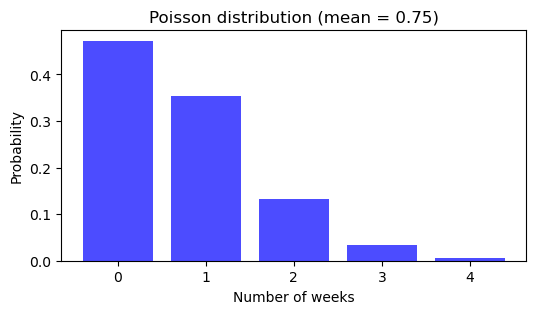

In [104]:

mean = 0.75
x = np.arange(0, 5)

dist = poisson.pmf(x, mean)

plt.figure(figsize=(6, 3))
plt.bar(x, dist, color='blue', alpha=0.7)
plt.xlabel('Number of weeks')
plt.ylabel('Probability')
plt.title('Poisson distribution (mean = 0.75)')

plt.show()



In [113]:
import math
k = 2
e = 2.71828
m = 0.75
f_85 = math.factorial(k)

p = ((e ** -m)*(m ** k))/(f_85)
p_precentage = p*100
print("P(X=2) =", p)
print("Percentage of probability:", p_precentage, "%")

P(X=2) = 0.13285315998142286
Percentage of probability: 13.285315998142286 %


We can conclude the probability that 2 injuries will occur within a week equals 0.13 or 13%.

***

### Author: Ilia Grishkin
#### https://github.com/replicant34/Projects
### <center>Change log</center>

|  Date | Change Description | Changed By  |  Status |
|---|---|---|---|
| 22.03.2024  | Content, structure (titles, subtitles) | Ilia  |  Pushed |
| 25.03.2024  | Task 3 - Probability (Continuous) | Ilia  |  Pushed |
| 26.03.2024  | Task 2 - Probability (Discrete) part 1 (dies) | Ilia  |  Pushed |
| 27.03.2024  | Task 3 - Injuries, grammar check task 2,3 | Ilia  |  Pushed |